In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [3]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [5]:
filenames= os.listdir("/content/drive/MyDrive/FACE/face train/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='tung':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

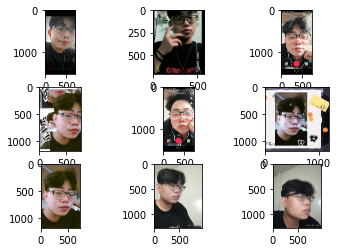

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/FACE/face train/tung/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'tung ' +'('+ str(i+1) + ')'+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'],run_eagerly=True)

In [12]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0:'tung',1:'tuan'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [14]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/FACE/face train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/FACE/face velidation/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 33 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [15]:
history=model.fit(train_dataset,batch_size=15,epochs=10,verbose=1,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 1.5620 - accuracy: 0.4848 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - 8s 3s/step - loss: 0.7134 - accuracy: 0.7879 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - 6s 1s/step - loss: 0.4277 - accuracy: 0.8788 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.3217 - accuracy: 0.9091 - lr: 0.0010
Epoch 5/10
3/3 [==============================] - 4s 957ms/step - loss: 0.2910 - accuracy: 0.8485 - lr: 0.0010
Epoch 6/10
3/3 [==============================] - 4s 2s/step - loss: 0.1020 - accuracy: 0.9697 - lr: 0.0010
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.1010 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/10
3/3 [==============================] - 4s 1s/step - loss: 0.1222 - accuracy: 0.9697 - lr: 0.0010
Epoch 9/10
3/3 [==============================] - 4s 1s/step - loss: 0.0674 - accuracy: 0.9697 - lr: 0.0010
Epoch 10/10
3/3 [========

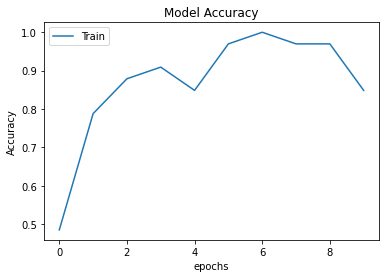

In [16]:
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [17]:
model.save('face_rec_10epochs.h5')

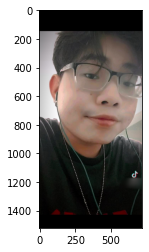

array([1])

In [18]:
filename = '/content/tung(1).jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)